In [89]:
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv('/Users/shivendragupta/Desktop/predictiveModels/student_data.csv')

In [91]:
df.head()

,ID,Name,Weight (kg),Height (cm)
0,1,Drew Jones,81,167
1,2,Reese Brown,85,203
2,3,Drew Taylor,102,208
3,4,Taylor Miller,82,206
4,5,Reese Brown,96,183


In [92]:
X = df.iloc[:,2:]

In [93]:
X.head()

,Weight (kg),Height (cm)
0,81,167
1,85,203
2,102,208
3,82,206
4,96,183


In [94]:
from sklearn.cluster import KMeans

In [95]:
kmeans = KMeans(n_clusters= 4, random_state=20)

In [96]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=20)

In [97]:
df['labels'] = kmeans.labels_

In [98]:
import matplotlib.pyplot as plt


In [99]:
centers = kmeans.cluster_centers_
centers


array([[ 84.35087719, 166.66666667],
       [ 56.72916667, 188.72916667],
       [ 84.52941176, 194.35294118],
       [ 49.62295082, 161.73770492]])

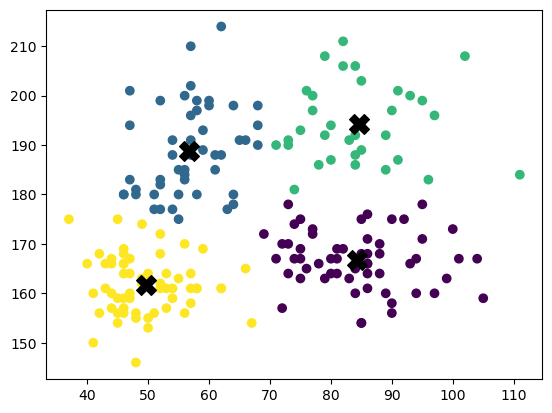

In [100]:
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=df['labels'])
plt.scatter(centers[:,0],centers[:,1],c='black', marker='X', s=200, label='Cluster Centers')

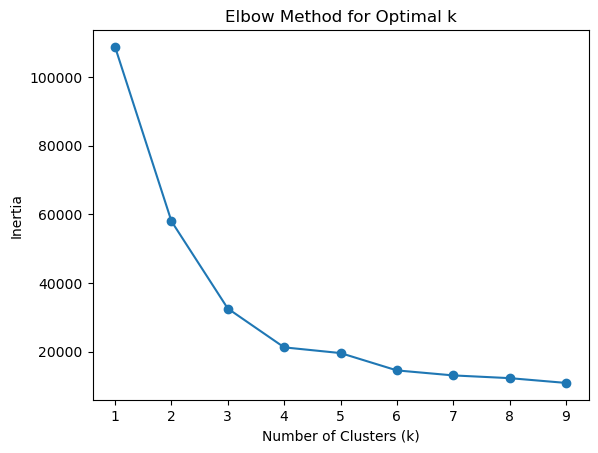

In [101]:
inertia = []
for i in range(1, 10):  # Check clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()